## Setup

This guide was written in Python 3.6.

### Python and Pip

Download [Python](https://www.python.org/downloads/) and [Pip](https://pip.pypa.io/en/stable/installing/).

Let's install the modules we'll need for this tutorial. Open up your terminal and enter the following commands to install the needed python modules: 

```
pip3 install scikit-learn
pip3 install scipy
```

## Introduction

Regression Analysis is a predictive modeling technique for figuring out the relationship between a dependent and independent variable. This is used for forecasting, time series modeling, among others. 


# Linear Regression

In Linear Regression, the dependent variable is continuous, and the independent variable(s) can be continuous or discrete, while nature of regression line is **linear**. Linear Regression establishes a relationship between the dependent variable (Y) and one or more independent variables (X), using a best fit straight line also known as regression line.

If the data actually lies on a line, then two sample points will be enough to get a perfect prediction. But, as in the example below, the input data is seldom perfect, so our “predictor” is almost always off by a bit. In this image, it's clear that only a small fraction of the data points appear to lie on the line itself.

![alt text](https://github.com/lesley2958/regression/blob/master/linreg.png?raw=true "Logo Title Text 1")

It's obvious that we can't assume a perfect prediction based off of data like this, so instead we wish to summarize the trends in the data using a simple description mechanism. In this case, that mechanism is a *line*. Now the computation required to find the “best” coefficients of the line is straightforward once we pick a suitable definition of “best”. *This is what we mean by best fit line.* 


## Basic Equation

The variable that we want to predict, `y`, is called the independent variable. We can collect values of y for known values of x to derive the co-efficient and y-intercept of the model using certain assumptions. The equation looks like below:

``` 
y = a + bx + e
```

Here, `a` is the y-intercept, `b` is the slope of the line, and `e` is the error term. Usually we don't know the error term, so we reduce this equation to:

```
y = a + bx
```

## Error Term

The difference between the observed value of the dependent variable and the predicted value is called the error term, or residual. Each data point has *its own* residual.

When a residual plot shows a random pattern, it indicated a good fit for a linear model. The error, or loss, function specifics depends on the type of machine learning algorithm. In Regression, it's (y - y&#770;)<sup>2</sup>, known as the <b>squared</b> loss. Note that the loss function is something that you must decide on based on the goals of learning. 

## Variance

Recall that variance gives us an idea of the range or spread of our data and that we denote this value as &sigma;<sup>2</sup>. In the context of regression, this matters because it gives us an idea of how accurate our model is.

For example, given the two graphs below, we can see that the second graph would be a more accurate model. 

![alt text](https://github.com/lesley2958/regression/blob/master/ther1.jpeg?raw=true "Logo Title Text 1")

![alt text](https://github.com/lesley2958/regression/blob/master/ther2.jpeg?raw=true "Logo Title Text 1")

To figure out how precise future predictions will be, we then need to see how much the outputs very around the mean population regression line. Unfortunately, as &sigma;<sup>2</sup> is a population parameter, so we will rarely know its true value - that means we have to estimate it. 

## Assumptions

There are four assumptions that allow for the use of linear regression models. If any of these assumptions is violated, then the forecasts, confidence intervals, and insights yielded by a regression model may be inefficient, biased, or misleading. 

### Linearity

The first assumption is the linearity and additivity between dependent and independent variables. Because of this assumption, the expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed. Lastly, the slope of this doesn't depend on the other variables. 

### Statistical Independence

The statistical independence of the errors means there is no correlation between consecutive errors.

### Homoscedasticity

This refers to the idea that there is a constant variance of errors. This is true against time, predictions, and any independent variable. 

### Error Distribution

This says that the distribution of errors is normal.


## Disadvantages

First, if the data doesn't follow the normal distribution, the validity of the regression model suffers. 

Secondly, there can be collinearity problems, meaning if two or more independent variables are strongly correlated, they will eat into each other's predictive power. 

Thirdly, if a large number of variables are included, the model may become unreliable. Regressions doesn't automatically take care of collinearity.

Lastly, regression doesn’t work with categorical variables with multiple values. These variables need to be converted to other variables before using them in regression models.

### Example 1

This example uses the first feature of the diabetes dataset to illustrate a two-dimensional plot of the linear regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

First, we input the needed modules and load the diabetes dataset:

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
diabetes = datasets.load_diabetes()

Since we're only using one feature, we pick it out: 

In [25]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

Next, we split the data into training/testing sets

In [26]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

We do the same for the outputs: 

In [27]:
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

Next, we create the linear regression object by calling the class:

In [28]:
regr = linear_model.LinearRegression()

Now, we're able to train the model using the training sets

In [29]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's take a look at what our coefficients are:

In [30]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 938.23786125]


#### Metrics

For regression, we use the **Sum of Squared Error**, which is the following formula:

$$ \sum_j \left[f(X_{j \cdot}) - y_j\right]^2. $$

In Python, you can compute this with `numpy` and built-in mathematical operators:

In [31]:
print(np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

2548.07239873


However, you can also use the built-in methods provided by `sklearn` to compute the mean squared error. 

In [32]:
print( metrics.mean_squared_error(regr.predict(diabetes_X_test), diabetes_y_test))

2548.07239873


Since the sum of squared error is susceptible to outliers, when a particular set of data contains outliers, we use the **Absolute Error** instead:

$$ \sum_j \left|f(X_{j \cdot}) - y_j\right|. $$

In Python, this looks very similar to the `mean_squared_error` function call:

In [33]:
print(metrics.mean_absolute_error(regr.predict(diabetes_X_test), diabetes_y_test))

41.2270912898


Now let's see what the variance is: 

In [34]:
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Variance score: 0.47


And finally, let's plot the outputs of the test data:

In [35]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

Let's see what we get! 

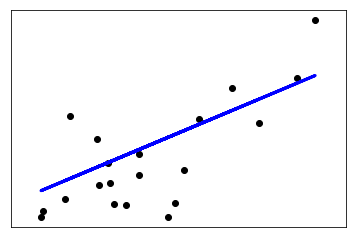

In [36]:
plt.xticks(())
plt.yticks(())
plt.show()

## Non Linear Regression

Non-linear regression analysis uses a curved function, usually a polynomial, to capture the non-linear relationship between the two variables. The regression is often constructed by optimizing the parameters of a higher-order polynomial such that the line best fits a sample of (x, y) observations.

There are cases where non-linear models are <b>intrinsically linear</b>, meaning they can be made linear by simple transformation. But more interestingly, are the ones where it can't.

While a polynomial regression might seem like the best option to produce a low error, it's important to be aware of the possibility of overfitting your data. Always plot the relationships to see the fit and focus on making sure that the curve fits the nature of the problem. 

![alt text](https://github.com/lesley2958/regression/blob/master/und-over.png?raw=true "Logo Title Text 1")


### Start Values

Finding good starting values is very important in non-linear regression to allow the model algorithm to converge. If you set starting parameters values completely outside of the range of potential parameter values the algorithm will either fail or it will return non-sensical parameter like for example returning a growth rate of 1000 when the actual value is 1.04.

The best way to find correct starting value is to eyeball the data, plotting them and based on the understanding that you have from the equation find approximate starting values for the parameters.


### Example 1

We begin by loading in the needed modules and data: 

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
xdata = np.array([-2,-1.64,-1.33,-0.7,0,0.45,1.2,1.64,2.32,2.9])
ydata = np.array([0.699369,0.700462,0.695354,1.03905,1.97389,2.41143,1.91091,0.919576,-0.730975,-1.42001])

Before we start, let's get a look at the scatterplot: 

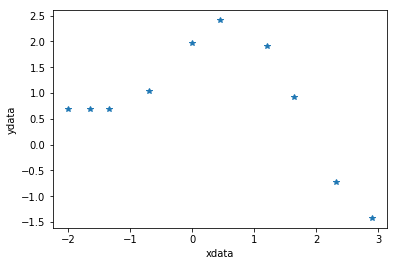

In [2]:
plt.plot(xdata,ydata,"*")
plt.xlabel("xdata")
plt.ylabel("ydata")
plt.show()

Here, I define the fit function:

In [3]:
def func(x, p1,p2):
  return(p1*np.cos(p2*x) + p2*np.sin(p1*x))

This is where we calculate and show fit parameters: 

In [4]:
popt, pcov = curve_fit(func, xdata, ydata,p0=(1.0,0.2))

Next, we calculate and show sum of squares of residuals since it's not given by the curve_fit function

In [5]:
p1 = popt[0]
p2 = popt[1]
residuals = ydata - func(xdata,p1,p2)
fres = sum(residuals**2)

And finally, let's plot the curve line along with our data:

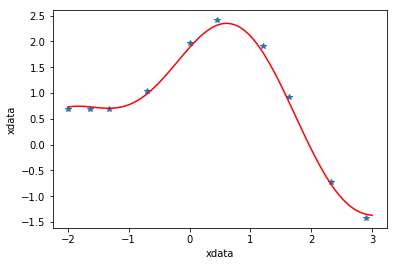

In [6]:
curvex = np.linspace(-2,3,100)
curvey = func(curvex,p1,p2)
plt.plot(xdata,ydata,"*")
plt.plot(curvex,curvey,"r")
plt.xlabel("xdata")
plt.ylabel("xdata")
plt.show()

# Multiple Linear Regression

Multiple linear regression is similar to simple linear regression, the only difference being the use of more than one input variable. This means we get a basic equation that's slightly different from linear regression.


## Basic Equation

In multiple linear regression, there is more than one explanatory variable. The basic equation we've seen before becomes:

Y<sub>i</sub> = m<sub>0</sub> + m<sub>1X</sub>1i</sub> + m<sub>2</sub>X<sub>2i</sub> + &isin;<sub>i</sub>

where &isin;<sub>i</sub> are independent random variables with a mean of 0. 

## Assumptions

The assumptions are the same as for simple regression.

## Mutlicollinearity

Recall, multicollinearity occurs when two or more variables are related. The best way of dealing with multicollinearity is to understand the cause and remove it. If one of the variables appears to be redundant, removing it can reduce multicollinearity. To make this decision, examine the correlations between variables.
 
Other strategies include:

- Figuring out if there is a way to combine the variables.
- Increasing the sample size of your study. 
- Centering the variables by computing the mean of each independent variable and then replacing each value with the difference between it and the mean.

## Example 1

Here, we import our `scikit-learn` module and declare our input data, X and Y, as lists:

In [8]:
from sklearn.linear_model import LinearRegression
x = [[2,4],[3,6],[4,5],[6,7],[3,3],[2,5],[5,2]]
y = [14,21,22,32,15,16,19]

Next, we initialize the model then train it on the data

In [9]:
genius_regression_model = LinearRegression()
genius_regression_model.fit(x,y)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

And finally, we predict the corresponding value of Y for X = [8,4]

In [10]:
print(genius_regression_model.predict([8,4]))

[ 32.]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## Logistic Regression

Logistic Regression is a statistical technique capable of predicting a <b>binary</b> outcome. Its output is a continuous range of values between 0 and 1, commonly representing the probability of some event occurring. Logistic regression is fairly intuitive and very effective - we'll review the details now.

### Example 1

Here, we'll use the Iris dataset from the Scikit-learn datasets module. We'll use 2 of the classes to keep this binary. 

First, let's begin by importing the needed modules and dataset: 

In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import math
from __future__ import division
data = datasets.load_iris()

In [12]:
X = data.data[:100, :2]
y = data.target[:100]
X_full = data.data[:100, :]

Before we make the logistic regression function, let's take a look to see what we're working with:

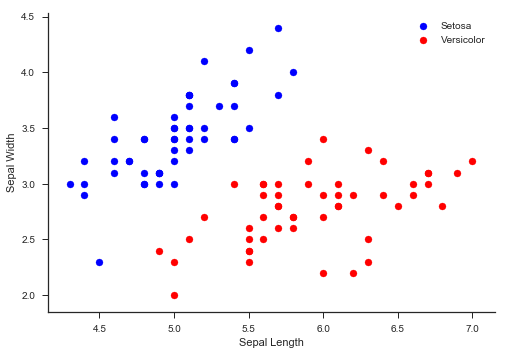

In [13]:
setosa = plt.scatter(X[:50,0], X[:50,1], c='b')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='r')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
sns.despine()
plt.show()

Now you can see that the two classes are completely separate! That means we can [more easily] find a function that separates the two classes. 

We want to return a value between 0 and 1 to represent a probability. To do this we make use of the logistic function. The logistic function mathematically looks like this:

![alt text](https://github.com/lesley2958/regression/blob/master/logistic%20function.png?raw=true "Logo Title Text 1")

Let's take a look at this plot:


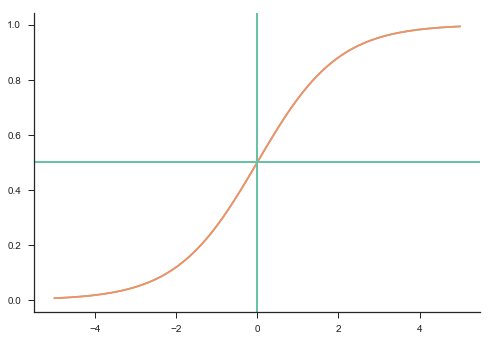

In [15]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + math.e**(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.axhline(.5)
plt.axvline(0)
sns.despine()
plt.show()

You can see why this is a great function for a probability measure. The y-value represents the probability and only ranges between 0 and 1. Also, for an x value of zero you get a .5 probability and as you get more positive x values you get a higher probability and more negative x values a lower probability.

Recall the function from earlier, Y<sub>i</sub> = m<sub>0</sub> + m<sub>1</sub>X<sub>1i</sub> + m<sub>2</sub>X<sub>2i</sub> + &isin;<sub>i</sub>. We can assume that x is a linear combination of the data plus an intercept, so we get the following formula:

x = &beta;<sub>0</sub> + &beta;<sub>1</sub>SW + &beta;<sub>2</sub>SL

where SW is our sepal width and SL is our sepal length. But how do we get our &beta; values? This is where the learning in machine learning comes in. 

### Cost Function 

We want to choose Î² values to maximize the probability of correctly classifying our plants. If we assume our data are independent and identically distributed (iid), we can take the product of all our individually calculated probabilities and that is the value we want to maximize. We get the following formula:

![alt text](https://github.com/lesley2958/regression/blob/master/cost-logistic.png?raw=true "Logo Title Text 1")

This simplifies to: &prod;<sub>setosa</sub> h(x) &prod;<sub>versicolor</sub> 1 - h(x). So now we know what to maximize. We can also switch it to - &prod;<sub>setosa</sub> h(x) &prod;<sub>versicolor</sub> 1 - h(x) and minimize this since minimizing the negative is the same as maximizing the positive. 

We can implement this logistic function like this:

In [16]:
def logistic_func(theta, x):
    return (float(1) / (1 + math.e**(-x.dot(theta))))

And finally, in python, we put all the components together like this: 

In [17]:
def cost_func(theta, x, y):
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return (np.mean(final))

### Gradients

We now know what value to minimize, but now we need to figure out how to find the &beta; values. This is where convex optimization comes in. 

Since we know the logistic cost function is convex, it has a single global minimum which we can converge using gradient descent. 

The idea behind gradient descent is to pick a point on the curve and follow it down to the minimum. The way we follow the curve is by calculating the gradients or the first derivatives of the cost function with respect to each &beta;.

Now if we define y<sub>i</sub> to be 1 for sentose and 0 for when it's versicolor, then we can simplify to h(x) and 1 - h(x). Recall [log rules](http://www.mathwords.com/l/logarithm_rules.htm). If we take the log of our cost function, our product becomes a sum:

![alt text](https://github.com/lesley2958/regression/blob/master/cost%20funct%202.png?raw=true "Logo Title Text 1")

The next step is to take the derivative with respect to &beta;<sub>0</sub>. Remembering that the derivate of log(x) is 1/x, we get:

![alt text](https://github.com/lesley2958/regression/blob/master/deriv.png?raw=true "Logo Title Text 1")

We have to take the derivative of h(x), which we can do with the quotient rule to see that it's: 

![alt text](https://github.com/lesley2958/regression/blob/master/deriv1.png?raw=true "Logo Title Text 1")

Since the derivative of x with respect to &beta;<sub>0</sub> is just 1, we can put all of this together to get: 

![alt text](https://github.com/lesley2958/regression/blob/master/deriv2.png?raw=true "Logo Title Text 1")

Now we can simplify this to y<sub>i</sub>(1-h(x<sub>i</sub>))-(1-y<sub>i</sub>)h(x<sub>i</sub>) = y<sub>i</sub>-y<sub>i</sub>h(x<sub>i</sub>)-h(x<sub>i</sub>)+y<sub>i</sub>h(x<sub>i</sub>) = y<sub>i</sub> - h(x<sub>i</sub>).

So finally we get: 

![alt text](https://github.com/lesley2958/regression/blob/master/final-gradient.png?raw=true "Logo Title Text 1")

For &beta;<sub>1</sub>, we get:

![alt text](https://github.com/lesley2958/regression/blob/master/beta1.png?raw=true "Logo Title Text 1")

For &beta;<sub>2</sub>, we get: 

![alt text](https://github.com/lesley2958/regression/blob/master/beta2.png?raw=true "Logo Title Text 1")

In Python, we can write:

In [19]:
def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return (final_calc)

### Gradient Descent

So now that we have our gradients, we can use the gradient descent algorithm to find the values for our &beta;s that minimize our cost function. The algorithm is as follows:

1. Initially guess any values for &beta;
2. Repeat until we converge: &beta;<sub>i</sub> = &beta;<sub>i</sub>-(&alpha;* gradient with respect to &beta;<sub>i</sub>) for i = 0, 1, 2

Note that &alpha; is our learning rate, which is the rate at which we move towards our cost curve. 

Basically, we pick a random point on our cost curve, check to see which direction we need to go to get closer to the minimum by using the negative of the gradient, and then update our &beta; values to move closer to the minimum.

If we implement this all in python, we would get something like:

In [20]:
def grad_desc(theta_values, X, y, lr=.001, converge_change=.001):
    # normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    # setup cost iter
    cost_iter = []
    cost = cost_func(theta_values, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    while(change_cost > converge_change):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y))
        cost = cost_func(theta_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return(theta_values, np.array(cost_iter))

### Prediction

The goal to this entire exercise was to show how Logistic Regression can be used for prediction. We went through the process of implementing a cost function, gradient descent -- now we have to put it all together to predict the values!

Let's walk through this code: 


In [1]:
def pred_values(theta, X, hard=True):
    # normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return (pred_value)
    return (pred_prob)

Here I use the above code. I initalize our Î² values to zeros and then run gradient descent to learn these values.


In [ ]:
shape = X.shape[1]
y_flip = np.logical_not(y) #f lip Setosa to be 1 and Versicolor to zero to be consistent
betas = np.zeros(shape)
fitted_values, cost_iter = grad_desc(betas, X, y_flip)
print(fitted_values)

Now we run the `predicted_y()` function to see our probability: 

In [ ]:
predicted_y = pred_values(fitted_values, X)

We get 99, which means we got all but 1 value correctly.

But can we do another check by taking a look at how our gradient descent converged:

In [ ]:
plt.plot(cost_iter[:,0], cost_iter[:,1])
plt.ylabel("Cost")
plt.xlabel("Iteration")
sns.despine()
plt.show()

You can see that as we ran our algorithm, we continued to decrease our cost function and we stopped right at about when we see the decrease in cost to level out. Nice - everything seems to be working! Lastly, another nice check is to see how well a packaged version of the algorithm does:


In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X, y_flip)
sum(y_flip == logreg.predict(X))

## Time Series

A time series is a set of observations of a single variable at multiple different points in time. Time series data is different in that these observations <i>are</i> dependent on another variable. For example, the stock price of Microsoft today <i>is</i> related to the stock price yesterday.

### Stationarity 

A process is said to be <b>stationary</b> if the distribution of the observed values does <i>not</i> depend on time. For a stationary process, what we want is the distribution of the observed variable to be independent of time, so the mean and variance of our observations should be constant over time.

If we take the trends out of data, we can make it stationary, which then allows us to properly run regressions against other variables. Otherwise we would risk results that conflate the time trend with the effect of the other variables.  We can make data stationary by taking differences of the observations. 

### Autoregressive Model

In an autoregressive model, the response variable is regressed against previous values from the same time series. We say that a process if AR(1) if only the previous observed value is used. A process that uses the previous p values is called AR(p). A classic example of an AR(1) process is a random walk. In a random walk, a "walker" has an equal chance of stepping left or stepping right.

### Moving Average Model

A moving average model is similar to an autoregressive model except that instead of being based on the previous observed values, the model describes a relationship between an observation and the previous error terms. We say that a process is MA(1) if only the previous observed value is used. A process that uses the previous p values is called MA(p).

### Analysis

The New York Independent System Operator (NYISO) operates competitive wholesale markets to manage the flow of electricity across New York. We will be using this data, along with weather forecasts, to create a model that predicts electricity prices.

We begin by importing the needed modules and load the data:

In [21]:
import pandas as pd
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (10, 6)
day_ahead_market = pd.read_csv('./day_ahead_market_lbmp.csv')
real_time_market = pd.read_csv('./real_time_market_lbmp.csv')
weather_forecast = pd.read_csv('./weather_forecast.csv')

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


We want to have the times in actual time objects, but right now they're strings, so we have to convert string date column to a datetime type:


In [22]:
day_ahead_market['Time Stamp'] = pd.to_datetime(day_ahead_market['Time Stamp'], format='%m/%d/%Y %H:%M')
real_time_market['Time Stamp'] = pd.to_datetime(real_time_market['Time Stamp'], format='%m/%d/%Y %H:%M:%S')

Now we have to do the same for the weather data:

In [23]:
weather_forecast['Forecast Date'] = pd.to_datetime(weather_forecast['Forecast Date'], format='%m/%d/%Y')
weather_forecast['Vintage Date'] = pd.to_datetime(weather_forecast['Vintage Date'], format='%m/%d/%Y')
weather_forecast['Vintage'] = weather_forecast['Vintage'].astype('category')

Now we're going to re-index the data by name of region and timestamp. This helps us manipulate and access the data. 


In [24]:
dam_time_name = day_ahead_market.set_index(['Name', 'Time Stamp'])
rtm_time_name = real_time_market.set_index(['Name', 'Time Stamp'])

We're only looking at the data for NYC, so we then select just the data for that:

In [25]:
dam_nyc_lbmp = dam_time_name['LBMP ($/MWHr)']['N.Y.C.']
rtm_nyc_lbmp = rtm_time_name['LBMP ($/MWHr)']['N.Y.C.']

So then we plot this to see the emerging relationships on the data that's a day ahead:


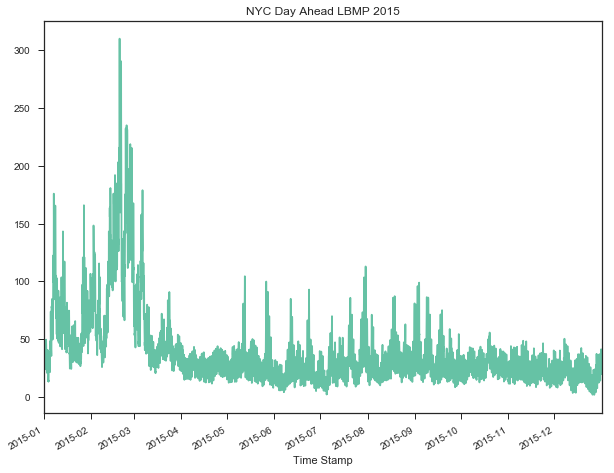

In [26]:
plt.figure(figsize=(10,8))
dam_nyc_lbmp.plot(title='NYC Day Ahead LBMP 2015')
plt.show()

And next for the data in real time:


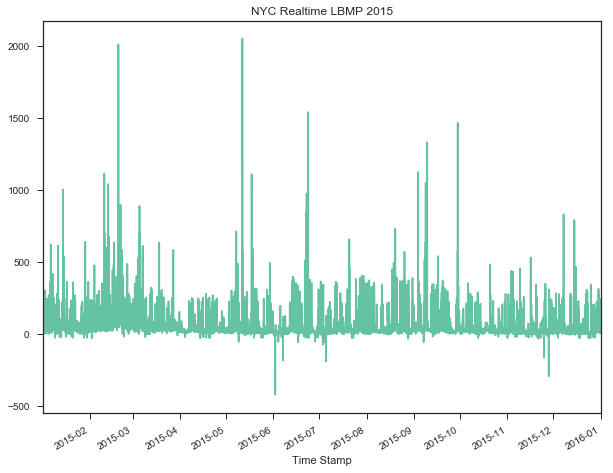

In [27]:
plt.figure(figsize=(10,8))
rtm_nyc_lbmp.plot(title='NYC Realtime LBMP 2015')
plt.show()

The timestamps on the realtime data and day ahead data don't actually line up. The realtime data has observations every 5 minutes while the day ahead data has observations every hour. So we need to fix this by aligning the two series of data.


In [28]:
aligned_dam, aligned_rtm = rtm_nyc_lbmp.align(dam_nyc_lbmp, join='inner')

Next, we remote duplicates:

In [29]:
no_dup_al_dam = aligned_dam[~aligned_dam.index.duplicated(keep='first')]
no_dup_al_rtm = aligned_rtm[~aligned_dam.index.duplicated(keep='first')]

no_dup_al_dam.name = 'dam_lbmp'
no_dup_al_rtm.name = 'rtm_lbmp'

Next step is to insert this data into a dataframe. The dataframe is too wide, however, so we transpose it:


In [30]:
dam_rtm_df = pd.DataFrame([no_dup_al_dam, no_dup_al_rtm]).transpose()

Now that we have our pricing data for the NYC region, we need to get the weather data ready. The weather data comes from a different data source, and unfortunately it's not split into the same exact regions as the pricing data. To remedy this, we'll pick two weather stations nearby - the ones located at JFK airport and LGA airport - and average the temperatures together.

This gets all the temperature data from LGA and JFK stations: 

In [31]:
lga_and_jfk_indexed = weather_forecast[(weather_forecast['Station ID'] == 'LGA') |
                                       (weather_forecast['Station ID'] == 'JFK')].set_index(['Forecast Date',
                                                                                             'Vintage Date',
                                                                                             'Vintage',
                                                                                             'Station ID'])

We still have to prep our data a bit more. So first we unindex, which will flatten our dataframe. Next, we pick out the rows with the Vintage being 'Actual' because we've got a few different kinds of dates floating around and it's important to stay consistent. Our end goal is to have our data like:

```
Time stamp: today
Temperature: the actual temperature today (x)
Day ahead price: today's price for electricity tomorrow (x)
Realtime price: tomorrrow's electricity price observed tomorrow (y)
```

To accomplish this, we write:

In [32]:
mean_nyc_indexed = lga_and_jfk_indexed.mean(level=[0,1,2])
mean_nyc = mean_nyc_indexed.reset_index()
actual_temp_df = mean_nyc[mean_nyc['Vintage'] == 'Actual'] \
    .groupby(['Vintage Date']).first() \
    .rename(columns=lambda x: 'Actual ' + x) # prepend the word Actual to column names
dam_rtm_act_df = dam_rtm_df.join(actual_temp_df, how='left').fillna(method='ffill').dropna()

Next, observe that there is a different day ahead price every single hour, but only a single temperature estimate per day. We'll do something similar to the frequency mismatch we saw with day ahead/realtime data - resample at the lower frequency and average the data in those lower frequency buckets.


In [ ]:
daily_df = dam_rtm_act_df.resample('D', how='mean')

The next question is whether to use the max temp or min temp. Let's take a look at the data to see if one or the other makes a difference: 


In [ ]:
plt.figure(figsize=(14,10))
plt.plot_date(daily_df.index, daily_df['rtm_lbmp'], '-', label='RTM LBMP')
plt.plot_date(daily_df.index, daily_df['dam_lbmp'], '-', label='DAM LBMP')
plt.plot_date(daily_df.index, daily_df['Actual Min Temp'], '-', label='Min Temp')
plt.plot_date(daily_df.index, daily_df['Actual Max Temp'], '-', label='Max Temp')
plt.legend()
plt.show()

Min and max temperature seem to be so highly correlated with each other that it most likely won't matter one way or another which we used.

#### Model Estimation

Now that our data is in the format we want, we can complete a regression called ARIMA. It's a combination of 3 types of models - AutoRegressive (a combination of the previous values), Integrated (differencing the data), Moving Average (smoothing the data). It's typically represented as:

```
arima(# of AR terms, # of differences, # of smoothing terms) = arima(p, d, q)
```

So how can we go about picking our parameters? A common approach is to use the Box-Jenkins Method for parameter selection. First, you pick parameter d. You can do this using a Dickey-Fuller test. Then, you can use autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the AR parameter (p) and the MA parameter (q).

For our example, we'll just pick ARIMA(0,0,1) for its simplicity (this is therefore just an MA(1) process).

Before fitting the model, we'll split our data into the training and test data:


In [ ]:
exog_data = np.array([daily_df['Actual Max Temp'].values, daily_df['dam_lbmp'].values])

Now we can fit the model on a portion of the data

In [ ]:
k = 250
m = ARIMA(daily_df['rtm_lbmp'].values[0:k], [0,0,1], exog=np.transpose(exog_data[:,0:k]), dates=daily_df.index.values[0:k])
results = m.fit(trend='nc', disp=True)

Let's look at the predicted prices:

In [ ]:
predicted_prices = results.predict(10, 364, exog=np.transpose(exog_data), dynamic=True)

Now let's look at it graphically:

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(predicted_prices, label='prediction')
plt.plot(daily_df['rtm_lbmp'].values, label='actual RTM')
plt.legend()
plt.show()

#### Analysis

Our model seems to work well from the graph of the forecast. Looking at the coefficients from the ARIMA model, we can see that increasing temperatures and increasing day ahead prices are both associated with higher realtime prices the next day. Just by looking at the coefficients, you can see that our forecast is extremely similar to the day ahead values, with a small adjustment based on temperature and another adjustment based on the moving average term.

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(predicted_prices, label='prediction')
plt.plot(daily_df['rtm_lbmp'].values, label='actual RTM')
plt.plot(daily_df['dam_lbmp'].values, label='actual DAM')
plt.legend()
plt.show()

Our data and model helps us predict the realtime electricity cost the day before. If you ran a company with significant power demands, you might be able to use such a model to decide whether or not to buy electricity in advance or on demand. Let's see how it would work:


In [ ]:
len(predicted_prices)
len(daily_df['rtm_lbmp'].values[10:])

print("--- Trading Log ---")

i = 251
PnL = np.zeros(100)


while i < 351:
    if (predicted_prices[i] < daily_df['dam_lbmp'].values[i]) and (daily_df['rtm_lbmp'].values[i+1] < daily_df['dam_lbmp'].values[i]):
        
        # if our model says the DAM is overpriced, then don't pre-buy and buy at the realtime price
        
        print("Buy RTM, +", daily_df['dam_lbmp'].values[i] - daily_df['rtm_lbmp'].values[i+1])
        PnL[i-251] = daily_df['dam_lbmp'].values[i] - daily_df['rtm_lbmp'].values[i+1]
        
    elif (predicted_prices[i] > daily_df['dam_lbmp'].values[i]) and (daily_df['rtm_lbmp'].values[i+1] > daily_df['dam_lbmp'].values[i]):
        
        # if our model says the DAM is underpriced, pre-buy the electricity so you don't have to pay realtime price 
        
        print("Buy DAM, +", daily_df['rtm_lbmp'].values[i+1] - daily_df['dam_lbmp'].values[i] )
        PnL[i-251] = daily_df['rtm_lbmp'].values[i+1] - daily_df['dam_lbmp'].values[i]
        
    else:
        
        # if we were wrong, we lose money :(
        
        print("Lose $$, -", max(daily_df['rtm_lbmp'].values[i+1] - daily_df['dam_lbmp'].values[i],daily_df['dam_lbmp'].values[i] - daily_df['rtm_lbmp'].values[i+1]))
        PnL[i-251] = min(daily_df['rtm_lbmp'].values[i+1] - daily_df['dam_lbmp'].values[i],daily_df['dam_lbmp'].values[i] - daily_df['rtm_lbmp'].values[i+1])
    i = i+1

Now lets take a look at the visualization:

In [ ]:
cumPnL = np.cumsum(PnL)
plt.figure(figsize=(10, 8))
plt.plot(cumPnL, label='PnL')
plt.legend()
plt.show()

Looks like the model works because it predicts every so slightly closer to the true RTM than the DAM!


In [ ]:
dam_adj = daily_df['rtm_lbmp'].values[10:]-daily_df['dam_lbmp'].values[:-10]
mod_adj = daily_df['rtm_lbmp'].values[10:]-predicted_prices[:-1]
plt.figure(figsize=(10, 8))
plt.plot(dam_adj, label='DAM error')
plt.plot(mod_adj, label='Model error')
plt.legend()
plt.show()

## Stepwise Regression

This form of regression is used when we deal with multiple independent variables. In this technique, the selection of independent variables is done with the help of an automatic process, which involves no human intervention.

Stepwise Regression is sensitive to initial inputs, which can be mitigated by repeatedly running the algorithm on bootstrap samples.

### Bootstrap

R has a package called `bootStepAIC()` that implements a Bootstrap procedure to investigate the variability of model selection with the function `stepAIC()`.

Using the `stepAIC()` function, you can input an already fitted lm/glm model and the associated dataset. Weâ€™ll use the BostonHousing dataset from the mlbench package to showcase this:

In [1]:
library(bootStepAIC)
library(plotly)
library(mlbench)
 
# Load Boston housing dataset
data("BostonHousing")
 
# Fit Linear regression model
fit <- lm(crim ~ ., data = BostonHousing)
 
# Run bootstrapped stepwise regression
fit.boot <- boot.stepAIC(fit, data = BostonHousing, B = 100)

Loading required package: MASS
Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:MASS’:

    select

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



This gives us the following information:

- No of times a covariate was featured in the final model from `stepAIC()`
- No of times a covariateâ€™s coefficient sign was positive / negative
- No of times a covariate was statistically significant (default at alpha = 5%)



We do this by observing statistical values like R-square, t-stats, and AIC metric to discern significant variables. Stepwise regression basically fits the regression model by adding/dropping co-variates one at a time based on a specified criterion. Some of the most commonly used Stepwise regression methods are:

- Standard stepwise regression does two things: it adds and removes predictors as needed for each step.
- Forward selection starts with most significant predictor in the model and adds variable for each step.
- Backward elimination starts with all predictors in the model and removes the least significant variable for each step.

The aim of this modeling technique is to maximize the prediction power with minimum number of predictor variables. It is one of the methods to handle higher dimensionality of data set.


## Ridge and Lasso Regression

Ridge and Lasso regression are powerful techniques used for making efficient models with a large number of features. They work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called <b>regularization</b> techniques.

Ridge Regression specifically performs <b>L2</b> regularization, which means that it adds penalty equality to the <i>square</i> of magnitude of coefficients.

Lasso Regression, on the other hand, performs <b>L1</b> Regression, which means that it adds penalty equivalent to the <i>absolute</i> value of magnitude of coefficients.


### Penalization 

Lets try to understand the impact of model complexity on the magnitude of coefficients. As an example, I have simulated a sine curve (between 60Â° and 300Â°) and added some random noise using the following code:

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

Here, we just define input array with angles from 60 degrees to 300 degrees converted to radians:


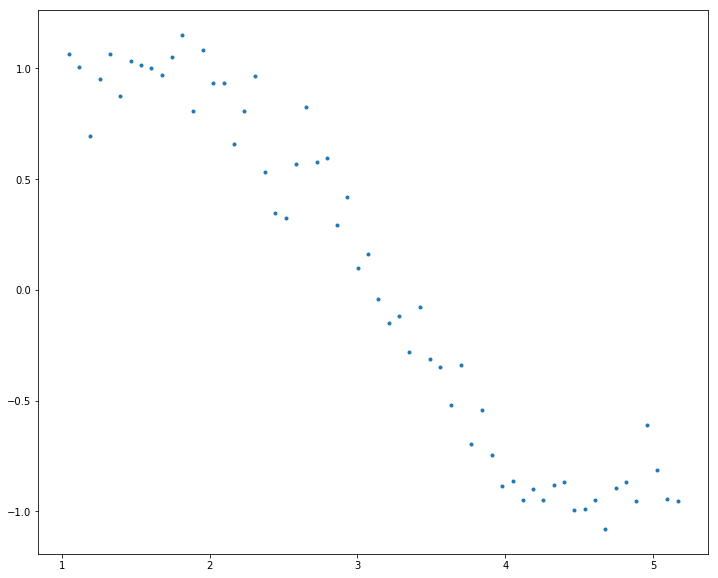

In [3]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.show()

The visualization resembles a sine curve but not exactly because of the noise we've input. Lets try to estimate the sine function using polynomial regression with powers of x from 1 to 15. Lets add a column for each power upto 15 in our dataframe. This can be accomplished using the following code:


In [5]:
for i in range(2,16):  # power of 1 is already there
    colname = 'x_%d'%i      # new var will be x_power
    data[colname] = data['x']**i

Now that we have all the 15 powers, lets make 15 different linear regression models with each model containing variables with powers of x from 1 to the particular model number. For example, the feature set of model 8 will be $\in$ {x, $x_2, x_3, ... , x_8$}.

First, we'll define a generic function which takes in the required maximum power of x as an input and returns a list containing [model RSS, intercept, coef_x, coef_x2, coef_xy ], where RSS refers to Residual Sum of Squares which is nothing but the sum of square of errors between the predicted and actual values in the training data set:

In [6]:
from sklearn.linear_model import LinearRegression

Here, we start out linear regression model by initializing the predictors:


In [10]:
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])

Then we fit the model:

In [ ]:
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])

Next, we check if a plot is to be made for the entered power:


In [ ]:
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)

Lastly, we return the result in pre-defined format


In [ ]:
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return (ret)

Now, we can make all 15 models and compare the results. We'll store all the results in a Pandas dataframe and plot 6 models to get an idea of the trend.

First, we initialize a dataframe to store the results:


In [ ]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

Next, we define the powers for which a plot is required:


In [12]:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

Lastly, we iterate through all powers and assimilate results


In [ ]:
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

plt.show()

As you can, models with increasing complexity to better fit the data and result in lower RSS values. This makes sense because as the model complexity increases, the models tends to overfit. 


As far as coefficients go, the size of coefficients increases exponentially with increase in model complexity. We can see this here:



In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

What does a large coefficient mean? It means that we're putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modelling intricate relations to estimate the output and ends up overfitting to the particular training data.


### Ridge Regression

Recall, ridge regression performs <b>L2 </b>regularization, i.e. it adds a factor of sum of squares of coefficients in the optimization objective, so it ends up optimizing:

```
Objective = RSS + $\alpha$ * (sum of square of coefficients)
```

Here, $\alpha$ is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. $\alpha$ can take various values:

$\alpha$ = 0:
- The objective becomes the same as simple linear regression.
- Weâ€™ll get the same coefficients as simple linear regression.

$\alpha$ = $\infty$:
- The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.

0 < $\alpha$ < $\infty$:
- The magnitude of Î± will decide the weightage given to different parts of objective.
- The coefficients will be somewhere between 0 and ones for simple linear regression

This tells us that any non-zero value would give values less than that of simple linear regression. Let's define a generic function for ridge regression similar to the one defined for simple linear regression:


In [ ]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):

Note that the function above takes $\alpha$ as a parameter on initialization. Now, we fit the model:


In [ ]:
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])

We check to see if a plot is to be made for the entered alpha:

In [ ]:
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)

Finally, we return the result in pre-defined format:

In [ ]:
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return(ret)

Now, lets analyze the result of Ridge regression for 10 different values of Î± ranging from 1e-15 to 20. These values have been chosen so that we can easily analyze the trend with change in values of Î±. 

First, we initialize predictors to be set of 15 powers of x

In [15]:
predictors = ['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

Then, we set the different values of alpha to be tested

In [16]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

We want to store the coefficients, so we initialize a dataframe for them:

In [17]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)
models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

Now we actually plot them: 

In [ ]:
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)
plt.show()

Here, we can see that as the value of alpha increases, the model complexity reduces. Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well, so alpha should be chosen wisely. A widely accept technique is cross-validation, i.e. the value of alpha is iterated over a range of values and the one giving higher cross-validation score is chosen.

Lets have a look at the value of coefficients in the above models:


In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

Ridge Regression is a technique used when the data suffers from multicollinearity (independent variables are highly correlated). In multicollinearity, even though the least squares estimates are unbiased, their variances are large which deviates the observed value far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.

Ridge regression solves the multicollinearity problem through shrinkage parameter &lambda;, shown below:

![alt text](https://github.com/lesley2958/regression/blob/master/ridge.png?raw=true "Logo Title Text 1")

In this equation, we have two components. First, is the least square term and other is lambda of the summation of $\beta_2$ (beta- square) where $\beta$ is the coefficient. This is added to least square term in order to shrink the parameter to have a very low variance.


### Assumptions

The assumptions of this regression is same as least squared regression, except normality is not to be assumed.